<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,37.967732,3.561844,51.529576,43.603364,7.926212
1,0.0,1.0,73.752004,-1.300271,82.451733,89.909950,-7.458218
2,0.0,2.0,77.435589,13.624461,101.060050,94.676689,6.383361
3,0.0,3.0,39.527115,10.643589,60.170704,45.621281,14.549423
4,0.0,4.0,81.095578,23.007282,114.102860,99.412892,14.689967
...,...,...,...,...,...,...,...
29995,999.0,25.0,86.847473,-19.126380,77.721093,93.573666,-15.852574
29996,999.0,26.0,71.224275,6.786971,88.011246,79.806878,8.204368
29997,999.0,27.0,91.395882,-7.730855,93.665027,97.581616,-3.916589
29998,999.0,28.0,88.038720,-27.364068,70.674652,94.623365,-23.948713


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    37.967732   3.561844   51.529576   43.603364   7.926212
      1.0    73.752004  -1.300271   82.451733   89.909950  -7.458218
      2.0    77.435589  13.624461  101.060050   94.676689   6.383361
      3.0    39.527115  10.643589   60.170704   45.621281  14.549423
      4.0    81.095578  23.007282  114.102860   99.412892  14.689967
...                ...        ...         ...         ...        ...
999.0 25.0   86.847473 -19.126380   77.721093   93.573666 -15.852574
      26.0   71.224275   6.786971   88.011246   79.806878   8.204368
      27.0   91.395882  -7.730855   93.665027   97.581616  -3.916589
      28.0   88.038720 -27.364068   70.674652   94.623365 -23.948713
      29.0   98.731171  -2.891709  105.839462  104.045297   1.794165

[30000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    37.967732   3.561844   51.529576   43.603364   7.926212
      1.0    73.752004  -1.300271   82.451733   89.909950  -7.458218
      2.0    77.435589  13.624461  101.060050   94.676689   6.383361
      3.0    39.527115  10.643589   60.170704   45.621281  14.549423
      4.0    81.095578  23.007282  114.102860   99.412892  14.689967
...                ...        ...         ...         ...        ...
999.0 25.0   86.847473 -19.126380   77.721093   93.573666 -15.852574
      26.0   71.224275   6.786971   88.011246   79.806878   8.204368
      27.0   91.395882  -7.730855   93.665027   97.581616  -3.916589
      28.0   88.038720 -27.364068   70.674652   94.623365 -23.948713
      29.0   98.731171  -2.891709  105.839462  104.045297   1.794165

[30000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,37.967732,3.561844,51.529576,43.603364,7.926212
1,0.0,1.0,73.752004,-1.300271,82.451733,89.909950,-7.458218
2,0.0,2.0,77.435589,13.624461,101.060050,94.676689,6.383361
3,0.0,3.0,39.527115,10.643589,60.170704,45.621281,14.549423
4,0.0,4.0,81.095578,23.007282,114.102860,99.412892,14.689967
...,...,...,...,...,...,...,...
29995,999.0,25.0,86.847473,-19.126380,77.721093,93.573666,-15.852574
29996,999.0,26.0,71.224275,6.786971,88.011246,79.806878,8.204368
29997,999.0,27.0,91.395882,-7.730855,93.665027,97.581616,-3.916589
29998,999.0,28.0,88.038720,-27.364068,70.674652,94.623365,-23.948713


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    37.967732   3.561844   51.529576   43.603364   7.926212
      1.0    73.752004  -1.300271   82.451733   89.909950  -7.458218
      2.0    77.435589  13.624461  101.060050   94.676689   6.383361
      3.0    39.527115  10.643589   60.170704   45.621281  14.549423
      4.0    81.095578  23.007282  114.102860   99.412892  14.689967
...                ...        ...         ...         ...        ...
999.0 25.0   86.847473 -19.126380   77.721093   93.573666 -15.852574
      26.0   71.224275   6.786971   88.011246   79.806878   8.204368
      27.0   91.395882  -7.730855   93.665027   97.581616  -3.916589
      28.0   88.038720 -27.364068   70.674652   94.623365 -23.948713
      29.0   98.731171  -2.891709  105.839462  104.045297   1.794165

[30000 rows x 5 columns]

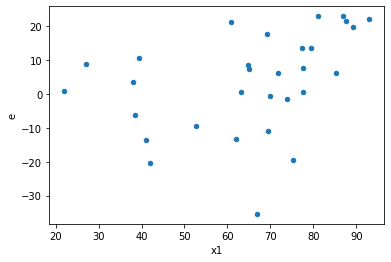

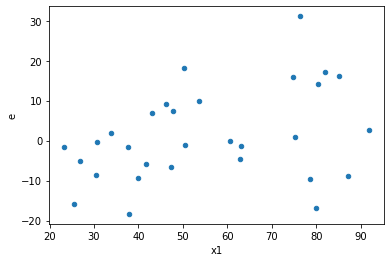

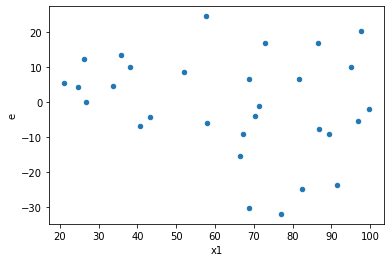

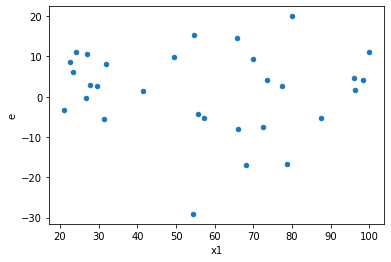

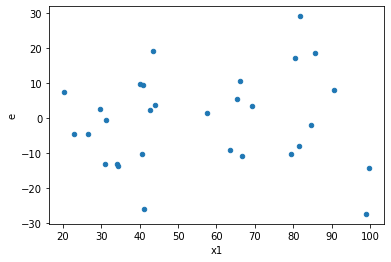

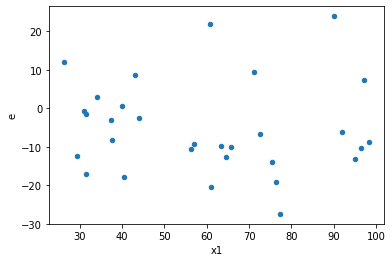

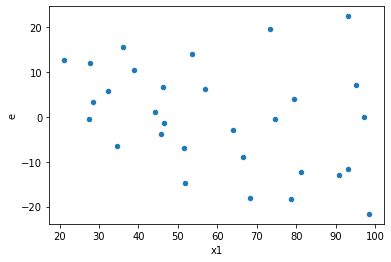

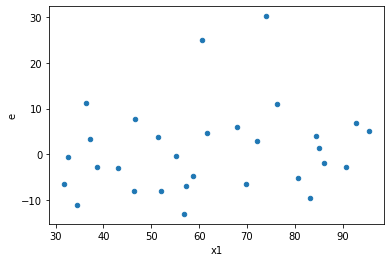

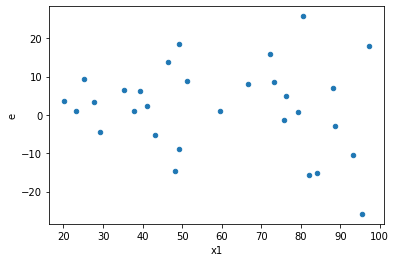

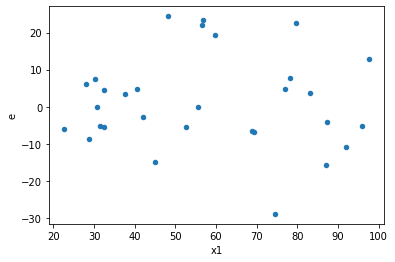

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,21.0,628.5041196167613,3791.329327796932,89.78630280239447,180.5394917998539,2.010768749407055,0.20381114586220517,0.8980944270688974,0.10190557293110258,Reject001=1 : Homoscedasticity
2.0,11.0,17.0,902.6134916122426,4117.0147175179545,82.05577196474933,242.17733632458555,2.951374784806406,0.04435509398742021,0.9778224530062899,0.022177546993710107,Reject001=1 : Homoscedasticity
3.0,11.0,17.0,338.85667727349096,2494.840525237631,30.805152479408267,146.7553250139783,4.763986320537677,0.004232008376761742,0.9978839958116191,0.002116004188380871,Reject001=0 : Heteroscedasticity
6.0,15.0,13.0,1009.0893377988872,2421.9708476198334,67.27262251992582,186.30544981691025,2.769409647464353,0.07242912121297707,0.9637854393935115,0.03621456060648853,Reject001=1 : Homoscedasticity
7.0,16.0,12.0,1369.1244600521397,1165.4595882211852,85.57027875325873,97.12163235176543,1.13499259049763,0.8387021009152713,0.5806489495423643,0.41935105045763565,Reject001=1 : Homoscedasticity
8.0,15.0,13.0,1041.422339641376,2344.0138801159624,69.42815597609174,180.3087600089202,2.5970552936910964,0.0915289347016921,0.954235532649154,0.04576446735084605,Reject001=1 : Homoscedasticity
10.0,7.0,21.0,955.5722690260932,2720.5172008930567,136.51032414658474,129.5484381377646,0.9490010293921473,0.9830183603946123,0.5084908198026938,0.49150918019730616,Reject001=1 : Homoscedasticity
11.0,13.0,15.0,2395.652532799668,4943.631749076045,184.28096406151292,329.575449938403,1.7884400139582015,0.2808286712560677,0.8595856643719662,0.14041433562803385,Reject001=1 : Homoscedasticity
12.0,11.0,17.0,536.5973693938165,2071.529868265704,48.7815790358015,121.8546981332767,2.497965431661115,0.08759463983926619,0.9562026800803669,0.04379731991963309,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,21.0,628.5041196167613,3791.329327796932,89.78630280239447,180.5394917998539,2.010768749407055,0.20381114586220517,Reject001=1 : Homoscedasticity
1.0,12.0,16.0,2195.298750463843,997.5290263864857,182.94156253865359,62.34556414915536,0.3407949690819024,0.0651420758922922,Reject001=1 : Homoscedasticity
2.0,11.0,17.0,902.6134916122426,4117.0147175179545,82.05577196474933,242.17733632458555,2.951374784806406,0.04435509398742021,Reject001=1 : Homoscedasticity
3.0,11.0,17.0,338.85667727349096,2494.840525237631,30.805152479408267,146.7553250139783,4.763986320537677,0.004232008376761742,Reject001=0 : Heteroscedasticity
4.0,14.0,14.0,2894.733953091423,1893.3219215168442,206.76671093510163,135.23728010834603,0.6540573165609491,0.4369307549504802,Reject001=1 : Homoscedasticity
5.0,15.0,13.0,3121.1579969963695,964.0068445550514,208.07719979975798,74.15437265808087,0.3563791358661254,0.059170616647264335,Reject001=1 : Homoscedasticity
6.0,15.0,13.0,1009.0893377988872,2421.9708476198334,67.27262251992582,186.30544981691025,2.769409647464353,0.07242912121297707,Reject001=1 : Homoscedasticity
7.0,16.0,12.0,1369.1244600521397,1165.4595882211852,85.57027875325873,97.12163235176543,1.13499259049763,0.8387021009152713,Reject001=1 : Homoscedasticity
8.0,15.0,13.0,1041.422339641376,2344.0138801159624,69.42815597609174,180.3087600089202,2.5970552936910964,0.0915289347016921,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      849
Reject001=0 : Heteroscedasticity    151
Name: Result_test, dtype: int64